# Pràctica 1

### 1- Introducció

In [134]:
reset()

In [3]:
X=[1950,1955,..,2005]
X

[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]

In [4]:
Y=[2.535093,2.770753,3.031931,3.342771,3.698676,4.076080,4.451470,4.855264,5.294879, 5.719045,6.124123,6.514751]
Y

[2.53509300000000,
 2.77075300000000,
 3.03193100000000,
 3.34277100000000,
 3.69867600000000,
 4.07608000000000,
 4.45147000000000,
 4.85526400000000,
 5.29487900000000,
 5.71904500000000,
 6.12412300000000,
 6.51475100000000]

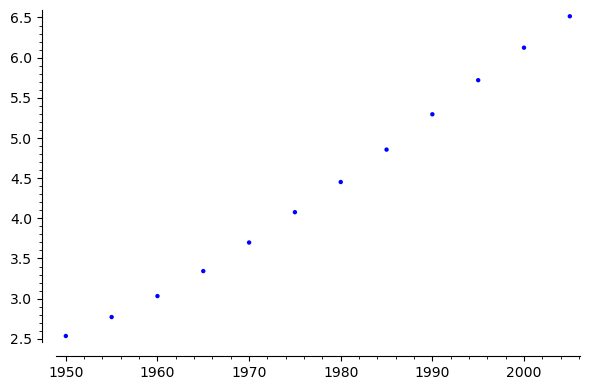

In [5]:
taula1=points([[X[i],Y[i]] for i in range(0,len(X))])
taula1

### 2- Presentació dels models

In [6]:
dY=[(Y[i+1]-Y[i])/(X[i+1]-X[i]) for i in range(0,len(X)-1)]
TC=[dY[i]/Y[i] for i in range(0,len(dY))]

In [7]:
print("  t        p(t)              p'(t)            p'(t)/p(t)")
for i in range(0,len(X)-1):
    print(X[i],Y[i],dY[i],TC[i])

  t        p(t)              p'(t)            p'(t)/p(t)
1950 2.53509300000000 0.0471320000000000 0.0185918228640922
1955 2.77075300000000 0.0522356000000000 0.0188524924451945
1960 3.03193100000000 0.0621680000000000 0.0205044244080752
1965 3.34277100000000 0.0711810000000000 0.0212940102687262
1970 3.69867600000000 0.0754808000000001 0.0204075187986188
1975 4.07608000000000 0.0750779999999999 0.0184191674353791
1980 4.45147000000000 0.0807588000000001 0.0181420519513779
1985 4.85526400000000 0.0879230000000000 0.0181087990272002
1990 5.29487900000000 0.0848332000000001 0.0160217447839696
1995 5.71904500000000 0.0810155999999999 0.0141659315497605
2000 6.12412300000000 0.0781256000000001 0.0127570265979309


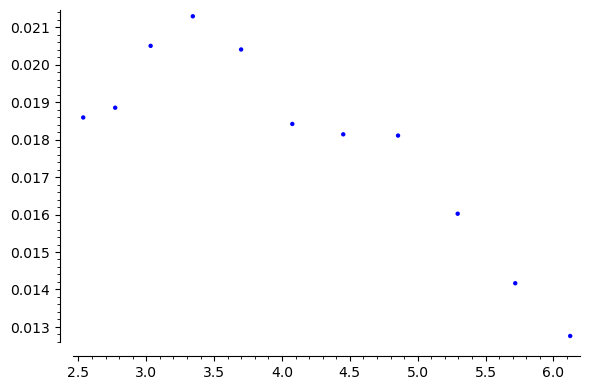

In [8]:
taula2=points([[Y[i],TC[i]] for i in range(0,len(dY))])
taula2

### Model de Malthus

In [9]:
a0=mean(TC)
a0

0.0179331809209386

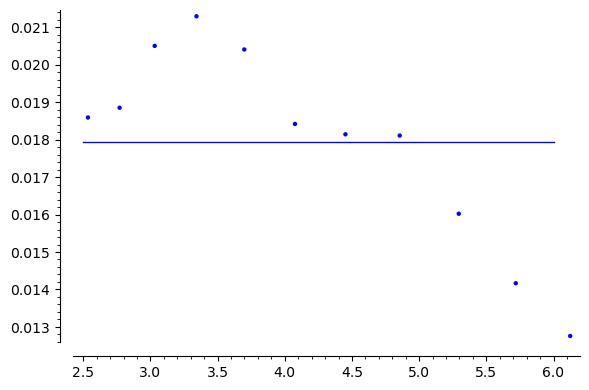

In [10]:
grafica1=taula2+plot(a0,2.5,6)
grafica1

In [11]:
var('t')
p=function('p')(t)

In [12]:
odesol=desolve(diff(p,t)-a0*p,[p,t],[X[0],Y[0]])
odesol

2535093/1000000*e^(2298657/128178989*t - 4482381150/128178989)

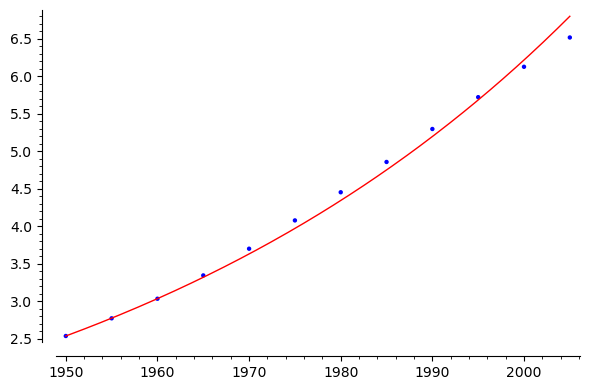

In [13]:
plotMalthus=plot(odesol(t),(t,1950,2005),color='red')
plotMalthus+taula1

In [14]:
odesol(2050).n()

15.2342840086471

In [15]:
odesol(oo)

+Infinity

### 4- Model de Verhulst (I)

In [16]:
taulaVerhulst1=[[Y[i],TC[i]] for i in range(0,len(dY))]
taulaVerhulst1

[[2.53509300000000, 0.0185918228640922],
 [2.77075300000000, 0.0188524924451945],
 [3.03193100000000, 0.0205044244080752],
 [3.34277100000000, 0.0212940102687262],
 [3.69867600000000, 0.0204075187986188],
 [4.07608000000000, 0.0184191674353791],
 [4.45147000000000, 0.0181420519513779],
 [4.85526400000000, 0.0181087990272002],
 [5.29487900000000, 0.0160217447839696],
 [5.71904500000000, 0.0141659315497605],
 [6.12412300000000, 0.0127570265979309]]

In [17]:
var("a b")
model1(x)=a*x+b

In [18]:
valorsrecta1=find_fit(taulaVerhulst1,model1)
valorsrecta1

[a == -0.0018289516293534644, b == 0.025564911399994672]

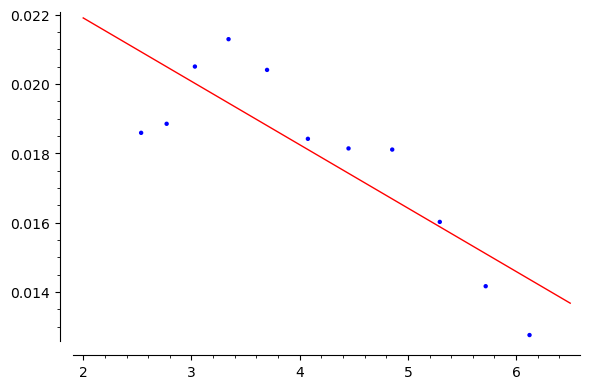

In [19]:
recta1=model1(a=valorsrecta1[0].rhs(),b=valorsrecta1[1].rhs())
plotrecta=plot(recta1,2,6.5,color='red')
taula2+plotrecta

In [20]:
muY=mean([Y[i] for i in range(0,len(dY))])
muY

4.17273500000000

In [21]:
muTC=mean([TC[i] for i in range(0,len(dY))])
muTC

0.0179331809209386

In [22]:
sY=std([Y[i] for i in range(0,len(dY))]) #standard deviation
sY

1.21956996175504

In [23]:
sTC=std([TC[i] for i in range(0,len(dY))]) #standard deviation
sTC

0.00265059878179804

In [24]:
correlacio1=1/(len(dY)-1)*sum((Y[i]-muY)/sY*(TC[i]-muTC)/sTC for i in range(0,len(dY)))
correlacio1

-0.841520981007737

In [25]:
errorVerhulst1=sum((TC[i]-recta1(x=Y[i]))^2 for i in range(0,len(dY)))
errorVerhulst1

0.0000205038980385275

In [26]:
errorMalthus=sum((TC[i]-a0)^2 for i in range(0,len(dY)))
errorMalthus

0.0000702567390206927

In [27]:
# Trobem l'equació p(t)

In [28]:
var('p')
integral1=integral(1/(p*model1(p)),p)
integral1

-log(a*p + b)/b + log(p)/b

In [29]:
ode_lhs1=integral1-integral1.subs(p=Y[0])
ode_lhs1

-log(a*p + b)/b + log(2.53509300000000*a + b)/b + log(p)/b - 0.930230322760750/b

In [30]:
ode_lhs11=ode_lhs1.subs(a=valorsrecta1[0].rhs(),b=valorsrecta1[1].rhs())
ode_lhs11

39.11611444114797*log(p) - 39.11611444114797*log(-0.0018289516293534644*p + 0.025564911399994672) - 187.635344352067

In [31]:
ode_rhs1=t-X[0]
ode_rhs1

t - 1950

In [32]:
solve(ode_lhs11-ode_rhs1,p)

[log(p) == 2148458/84039329*t + log(-3687878/2016389029*p + 2148458/84039329) - 1324807968495206/29404436784481]

In [33]:
sol1=solve(p/(-3687878/2016389029*p + 2148458/84039329)==exp(2148458/84039329*t - 1324807968495206/29404436784481),p)
P1=sol1[0].rhs()
P1

4332127140467282/84039329*e^(2148458/84039329*t - 1324807968495206/29404436784481)/(3687878*e^(2148458/84039329*t - 1324807968495206/29404436784481) + 2016389029)

In [34]:
P1(2050).n()

10.3527620535187

### 5- Model de Verhulst (II)

In [35]:
taulaVerhulst2=[[Y[i],TC[i]] for i in range(3,len(dY))]
taulaVerhulst2

[[3.34277100000000, 0.0212940102687262],
 [3.69867600000000, 0.0204075187986188],
 [4.07608000000000, 0.0184191674353791],
 [4.45147000000000, 0.0181420519513779],
 [4.85526400000000, 0.0181087990272002],
 [5.29487900000000, 0.0160217447839696],
 [5.71904500000000, 0.0141659315497605],
 [6.12412300000000, 0.0127570265979309]]

In [36]:
var("c d")
model2(x)=c*x+d

In [37]:
valorsrecta2=find_fit(taulaVerhulst2,model2)
valorsrecta2

[c == -0.0029278249856272845, d == 0.03116151428854692]

In [38]:
recta2=model2(c=valorsrecta2[0].rhs(),d=valorsrecta2[1].rhs())
recta2

-0.0029278249856272845*x + 0.03116151428854692

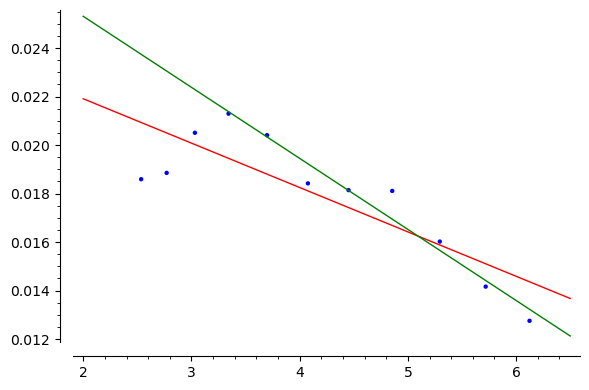

In [39]:
plotrecta2=plot(recta2,2,6.5,color='green')
taula2+plotrecta+plotrecta2

In [40]:
muY=mean([Y[i] for i in range(3,len(dY))])
muY

4.69528850000000

In [41]:
muTC=mean([TC[i] for i in range(3,len(dY))])
muTC

0.0174145313016204

In [42]:
sY=std([Y[i] for i in range(3,len(dY))]) #standard deviation
sY

0.981263982127862

In [43]:
sTC=std([TC[i] for i in range(3,len(dY))]) #standard deviation
sTC

0.00293292938986867

In [44]:
correlacio2=1/(len(dY)-4)*sum((Y[i]-muY)/sY*(TC[i]-muTC)/sTC for i in range(3,len(dY)))
correlacio2

-0.979556213044568

In [45]:
errorVerhulst2=sum((TC[i]-recta2(x=Y[i]))^2 for i in range(3,len(dY)))
errorVerhulst2

2.43685922058400e-6

In [46]:
ode2=diff(p,t)-p*recta2(p)
ode2

-p*(-0.0029278249856272845*p + 0.03116151428854692)

In [47]:
odesol2=desolve(ode2,[p,t],[X[0],Y[0]])
odesol2 # No funciona (no resol bé la equació)

NotImplementedError: Maxima was unable to solve this ODE. Consider to set option contrib_ode to True.

In [48]:
var('p')
integral2=integral(1/(p*model2(p)),p)
integral2

-log(c*p + d)/d + log(p)/d

In [49]:
ode_lhs2=integral2-integral2.subs(p=Y[3])
ode_lhs2

-log(c*p + d)/d + log(3.34277100000000*c + d)/d + log(p)/d - 1.20680010374554/d

In [50]:
ode_lhs22=ode_lhs2.subs(c=valorsrecta2[0].rhs(),d=valorsrecta2[1].rhs())
ode_lhs22

32.09086666136566*log(p) - 32.09086666136566*log(-0.0029278249856272845*p + 0.03116151428854692) - 162.134558406839

In [51]:
ode_rhs2=t-X[3]
ode_rhs2

t - 1965

In [52]:
solve(ode_lhs22-ode_rhs2,p)

[log(p) == 2024747/64975886*t + log(-1386833/473673463*p + 7331941/235288341) - 2144983695083055/38180545348346]

In [53]:
var('p', domain='real')
solve(ode_lhs22-ode_rhs2,p)

[log(p) == 2024747/64975886*t + log(-1386833/473673463*p + 7331941/235288341) - 2144983695083055/38180545348346]

In [54]:
exp(ode_lhs22)

e^(32.09086666136566*log(p) - 32.09086666136566*log(-0.0029278249856272845*p + 0.03116151428854692) - 162.134558406839)

In [55]:
exp(ode_rhs2)

e^(t - 1965)

In [56]:
sol2=solve(p/(-1386833/473673463*p + 7331941/235288341)==exp(2024747/64975886*t - 2144983695083055/38180545348346),p)
P2=sol2[0].rhs()
P2

3472945883981683/235288341*e^(2024747/64975886*t - 2144983695083055/38180545348346)/(1386833*e^(2024747/64975886*t - 2144983695083055/38180545348346) + 473673463)

In [57]:
print("  t       p_obs(t)        p_mod(t)")
for i in range(3,len(X)):
    print(X[i],Y[i],(P2(X[i])).n())

  t       p_obs(t)        p_mod(t)
1965 3.34277100000000 3.34277099999991
1970 3.69867600000000 3.70991388762916
1975 4.07608000000000 4.09476339729165
1980 4.45147000000000 4.49366061689152
1985 4.85526400000000 4.90232616917611
1990 5.29487900000000 5.31602925018465
1995 5.71904500000000 5.72979985667652
2000 6.12412300000000 6.13866474950730
2005 6.51475100000000 6.53788374205261


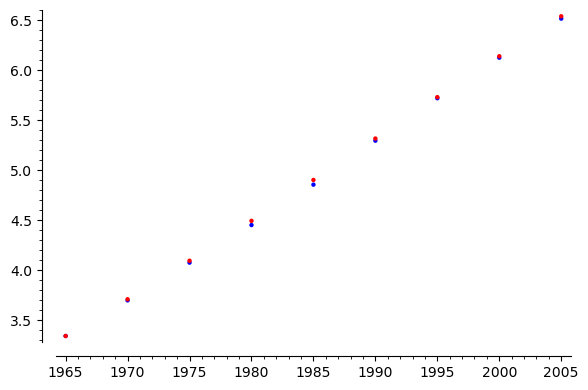

In [58]:
punts1=points([[X[i],Y[i]] for i in range(3,len(X))],color='blue')
punts2=points([[X[i],P2(t=X[i])] for i in range(3,len(X))],color='red')
punts1+punts2

In [59]:
XX=[2010,2015,..,2050]
XX

[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

In [60]:
print("  t       p_mod(t)")
for i in range(0,len(XX)):
    print(XX[i],(P2(XX[i])).n())

  t       p_mod(t)
2010 6.92316284775327
2015 7.29082468258608
2020 7.63792333646508
2025 7.96229909676954
2030 8.26257619268085
2035 8.53811275575866
2040 8.78891573535975
2045 9.01553452634071
2050 9.21894603545054


In [61]:
sol=solve(P2==7,t)
T=sol[0].rhs().n()
T

2011.02397125036

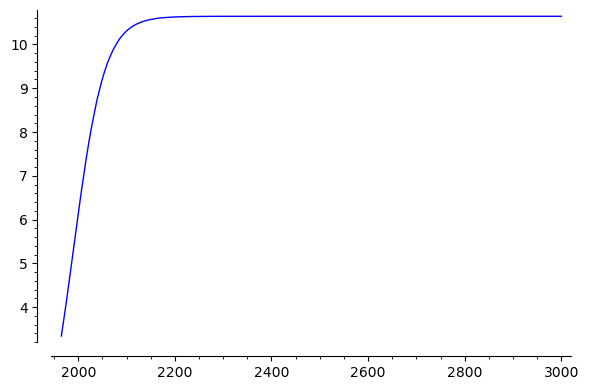

In [62]:
plot(P2,xmin=1965,xmax=3000)

In [63]:
limit(P2,t=oo).n()

10.6432298520298

In [64]:
P2(2050).n()

9.21894603545054

### 6- 2005 versus 2020

In [ ]:
sol=solve(P2==8,t)
T8=sol[0].rhs().n()
T8

In [ ]:
p_mod1=odesol
p_mod2=P1
p_mod3=P2

In [ ]:
print("  t      p_mod1(t)        p_mod2(t)        p_mod3(t)")
for i in range(0,len(XX)):
    print(XX[i],(p_mod1(XX[i])).n(),(p_mod2(XX[i])).n(),(p_mod3(XX[i])).n())

Nom de la pràctica: 1570866_1.ipynb